### Import dependencies

In [1]:
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### Read dataset

In [2]:
data = pd.read_csv('../reduced.csv')
data.drop('Index', axis=1, inplace=True)
data.head()

x = data.iloc[:, :-1]
y = data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1) 

### Model

In [3]:
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

### Define Grid

In [4]:
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)

### Summary

In [5]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.512524 using {'max_features': 'log2', 'n_estimators': 1000}
0.460839 (0.008332) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.507190 (0.009377) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.512052 (0.009406) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.460018 (0.007981) with: {'max_features': 'log2', 'n_estimators': 10}
0.507098 (0.009330) with: {'max_features': 'log2', 'n_estimators': 100}
0.512524 (0.009366) with: {'max_features': 'log2', 'n_estimators': 1000}


In [10]:
model = RandomForestClassifier(max_features='log2', n_estimators=1000)
model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy_score(y_test, pred)

0.486

### Get the confusion matrix

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

confusion_matrix(y_test, pred)

array([[ 185,   47,  200,  254,  133,   57],
       [  66,  199,  161,  250,  194,   95],
       [  49,   47, 1312,  170,   96,   39],
       [  54,   76,   88,  670,  232,   51],
       [  59,   89,  160,  335,  358,   22],
       [  22,   49,  102,  117,   27,  435]], dtype=int64)

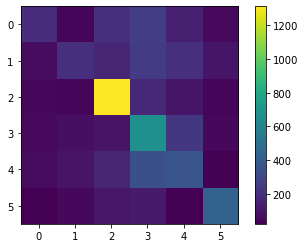

In [12]:
plt.imshow(confusion_matrix(y_test, pred))
plt.colorbar()

### Get the recall 

In [13]:
from sklearn.metrics import recall_score
recall_score(y_test, pred, average=None)

array([0.21118721, 0.20621762, 0.76590776, 0.57216055, 0.34995112,
       0.57845745])

### Get Precision

In [14]:
from sklearn.metrics import precision_score
precision_score(y_test, pred, average=None)

array([0.42528736, 0.39250493, 0.64854177, 0.37305122, 0.34423077,
       0.6223176 ])

### F1 score

In [15]:
from sklearn.metrics import f1_score
f1_score(y_test, pred, average=None)

array([0.28222731, 0.27038043, 0.70235546, 0.45163465, 0.34706738,
       0.59958649])